In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # Data Plotting
import matplotlib.image as mpimg
import seaborn as sns

import cv2

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

sns.set(style='white', context='notebook', palette='deep')



C:\Users\lenovo_pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Loading Data

TRAIN = pd.read_csv("./train.csv")
TEST = pd.read_csv("./test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

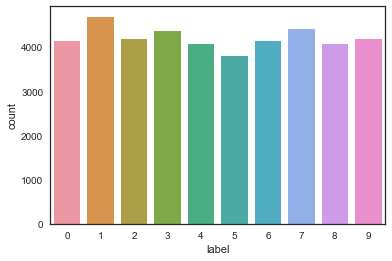

In [3]:
Y_train = TRAIN["label"]

# Drop 'label' column
X_train = TRAIN.drop(labels = ["label"],axis = 1) 

# free some space
del TRAIN 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [4]:
# Normalize the data
X_train = X_train / 255.0
TEST = TEST / 255.0

In [5]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
TEST = TEST.values.reshape(-1,28,28,1)

In [6]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [7]:
# Set the random seed
random_seed = 2

In [8]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

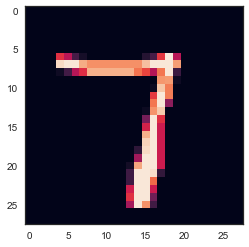

In [9]:
# Some examples
g = plt.imshow(X_train[1][:,:,0])

In [10]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [11]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [12]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [13]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [15]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 1499s - loss: 1.2549 - acc: 0.8374 - val_loss: 1.8091 - val_acc: 0.8840
Epoch 2/10
 - 1551s - loss: 4.6847 - acc: 0.7078 - val_loss: 2.7551 - val_acc: 0.8290
Epoch 3/10
 - 1579s - loss: 4.6790 - acc: 0.7091 - val_loss: 1.6330 - val_acc: 0.8983
Epoch 4/10
 - 1726s - loss: 5.3705 - acc: 0.6665 - val_loss: 4.0720 - val_acc: 0.7471
Epoch 5/10
 - 1879s - loss: 5.2061 - acc: 0.6769 - val_loss: 5.2192 - val_acc: 0.6762
Epoch 6/10
 - 1706s - loss: 6.1148 - acc: 0.6205 - val_loss: 5.5886 - val_acc: 0.6531
Epoch 7/10
 - 1470s - loss: 6.4297 - acc: 0.6010 - val_loss: 3.4232 - val_acc: 0.7876
Epoch 8/10
 - 1463s - loss: 6.7498 - acc: 0.5811 - val_loss: 3.4809 - val_acc: 0.7840
Epoch 9/10
 - 1463s - loss: 5.9260 - acc: 0.6323 - val_loss: 3.8143 - val_acc: 0.7633
Epoch 10/10
 - 1484s - loss: 5.3232 - acc: 0.6696 - val_loss: 3.4262 - val_acc: 0.7871


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

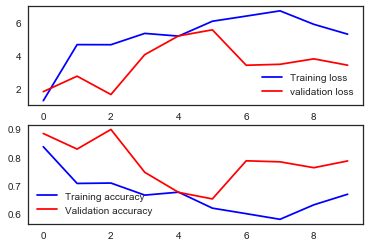

In [17]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

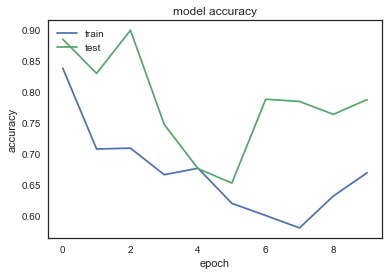

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

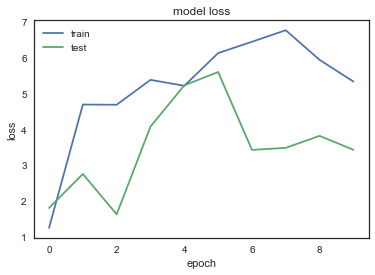

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
score = model.evaluate(X_train, Y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(X_val, Y_val, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

model train data score       :  79.0 %
model test data score        :  79.0 %
